# Optimizing Patient Scheduling v.I

Optimize the list with the following data with the constraints:
- Maximum Capacity 20
- Maximum time per patient is 1 hour
- Period time is from 00:00 to 23:59
    - Room1	 - Number of patients: 13
    - Room2	 - Number of patients: 15
    - Room3	 - Number of patients: 19
    - Room4	 - Number of patients: 11
    - Room5 - Number of patients: 14

In [1]:
import pulp
from pulp import *
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\nicol\anaconda3\envs\Python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nicol\anaconda3\envs\Python\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\nicol\anaconda3\envs\Python\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\nicol\anaconda3\envs\Python\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pulp

# Define the problem
prob = pulp.LpProblem("Patient scheduling", pulp.LpMaximize)

# Define the decision variables
rooms = ["Room1", "Room2", "Room3", "Room4", "Room5"]
patients = range(1, 73)
x = pulp.LpVariable.dicts("x", (patients, rooms), cat=pulp.LpBinary)

# Define the objective function
prob += pulp.lpSum([x[i][j] for i in patients for j in rooms]), "Total number of patients scheduled"

# Define the constraints
for i in patients:
    prob += pulp.lpSum([x[i][j] for j in rooms]) == 1, f"Patient {i} is scheduled only once"
for j in rooms:
    prob += pulp.lpSum([x[i][j] for i in patients]) <= 20, f"Room {j} capacity constraint"
for i in patients:
    for j in rooms:
        prob += x[i][j] == 0 or (i-1)*60 <= pulp.lpSum([x[k][j]*(k-i+1) for k in patients]) <= (i-1)*60+60, f"Patient {i} in room {j} time constraint"

# Solve the problem
prob.solve()

# Print the solution
print("Total number of patients scheduled: ", int(pulp.value(prob.objective)))
for j in rooms:
    print("Room ", j, ":")
    for i in patients:
        if pulp.value(x[i][j]) == 1:
            print("Patient ", i)

Total number of patients scheduled:  72
Room  Room1 :
Patient  5
Patient  7
Patient  10
Patient  12
Patient  26
Patient  36
Patient  46
Patient  50
Patient  51
Patient  60
Patient  69
Patient  71
Room  Room2 :
Patient  2
Patient  21
Patient  27
Patient  28
Patient  33
Patient  35
Patient  42
Patient  52
Patient  54
Room  Room3 :
Patient  1
Patient  13
Patient  14
Patient  16
Patient  17
Patient  19
Patient  22
Patient  23
Patient  25
Patient  29
Patient  31
Patient  32
Patient  37
Patient  41
Patient  43
Patient  45
Patient  53
Patient  56
Patient  59
Patient  64
Patient  65
Patient  67
Patient  68
Patient  70
Patient  72
Room  Room4 :
Patient  4
Patient  6
Patient  11
Patient  15
Patient  18
Patient  24
Patient  30
Patient  38
Patient  40
Patient  44
Patient  48
Patient  58
Patient  63
Patient  66
Room  Room5 :
Patient  3
Patient  8
Patient  9
Patient  20
Patient  34
Patient  39
Patient  47
Patient  49
Patient  55
Patient  57
Patient  62


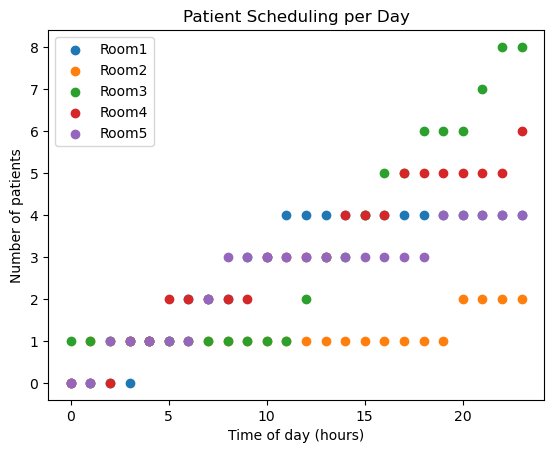

In [3]:
import numpy as np

# Define the time slots (one per minute)
timeslots = np.arange(0, 24)

# Get the number of scheduled patients for each time slot and room
scheduled = {}
for j in rooms:
    scheduled[j] = np.zeros(len(timeslots))
    for i in patients:
        if pulp.value(x[i][j]) == 1:
            start_time = (i-1)
            scheduled[j][start_time:start_time+60] += 1

# Create the line plot
fig, ax = plt.subplots()
for j in rooms:
    ax.scatter(timeslots, scheduled[j], label=j)
ax.set_xlabel("Time of day (hours)")
ax.set_ylabel("Number of patients")
ax.set_title("Patient Scheduling per Day")
ax.legend()

plt.show()

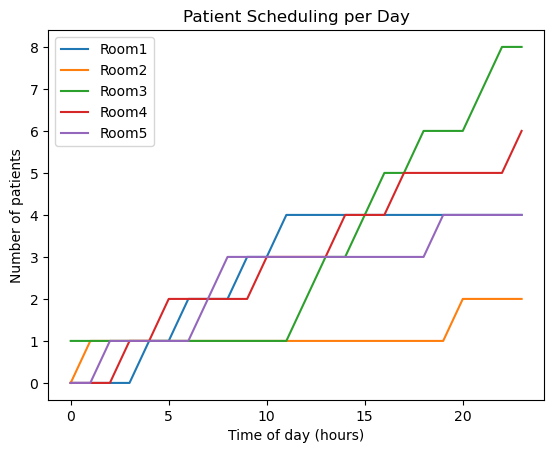

In [4]:
import numpy as np

# Define the time slots (one per minute)
timeslots = np.arange(0, 24)

# Get the number of scheduled patients for each time slot and room
scheduled = {}
for j in rooms:
    scheduled[j] = np.zeros(len(timeslots))
    for i in patients:
        if pulp.value(x[i][j]) == 1:
            start_time = (i-1)
            scheduled[j][start_time:start_time+60] += 1

# Create the line plot
fig, ax = plt.subplots()
for j in rooms:
    ax.plot(timeslots, scheduled[j], label=j)
ax.set_xlabel("Time of day (hours)")
ax.set_ylabel("Number of patients")
ax.set_title("Patient Scheduling per Day")
ax.legend()

plt.show()

# Optimizing Patient Scheduling v.II

In [5]:
import pulp
import pandas as pd

# Define the problem
prob = pulp.LpProblem("Patient scheduling", pulp.LpMaximize)

# Define the decision variables
rooms = ["Room1", "Room2", "Room3", "Room4", "Room5"]
patients = range(1, 73)
x = pulp.LpVariable.dicts("x", (patients, rooms), cat=pulp.LpBinary)

# Define the objective function
prob += pulp.lpSum([x[i][j] for i in patients for j in rooms]), "Total number of patients scheduled"

# Define the constraints
for i in patients:
    prob += pulp.lpSum([x[i][j] for j in rooms]) == 1, f"Patient {i} is scheduled only once"
for j in rooms:
    prob += pulp.lpSum([x[i][j] for i in patients]) <= 20, f"Room {j} capacity constraint"
for i in patients:
    for j in rooms:
        prob += x[i][j] == 0 or (i-1)*30 <= pulp.lpSum([x[k][j]*(k-i+1) for k in patients]) <= (i-1)*30+30, f"Patient {i} in room {j} time constraint"

# Solve the problem
prob.solve()

# Create the schedule DataFrame
schedule_df = pd.DataFrame(columns=["Start", "End", "Duration", "Patient", "Room"])
for i in patients:
    for j in rooms:
        if pulp.value(x[i][j]) == 1:
            start_time = (i - 1) * 30
            end_time = start_time + 30
            duration = 30
            patient_id = f"Patient {i}"
            room = j
            schedule_df.loc[len(schedule_df)] = [start_time, end_time, duration, patient_id, room]

schedule_df.head()

,Start,End,Duration,Patient,Room
0,0,30,30,Patient 1,Room3
1,30,60,30,Patient 2,Room2
2,60,90,30,Patient 3,Room5
3,90,120,30,Patient 4,Room4
4,120,150,30,Patient 5,Room1


In [6]:
# Count patiens per Room
schedule_df.Room.value_counts()

Room3    25
Room4    14
Room1    12
Room5    11
Room2     9
Name: Room, dtype: int64

In [7]:
# Create the pivot table
Table = pd.pivot_table(schedule_df, index = ['Patient'], values = ['Duration'], columns = ['Room'])

# Print the pivot table
Table

Duration                        
Room          Room1 Room2 Room3 Room4 Room5
Patient                                    
Patient 1       NaN   NaN  30.0   NaN   NaN
Patient 10     30.0   NaN   NaN   NaN   NaN
Patient 11      NaN   NaN   NaN  30.0   NaN
Patient 12     30.0   NaN   NaN   NaN   NaN
Patient 13      NaN   NaN  30.0   NaN   NaN
...             ...   ...   ...   ...   ...
Patient 70      NaN   NaN  30.0   NaN   NaN
Patient 71     30.0   NaN   NaN   NaN   NaN
Patient 72      NaN   NaN  30.0   NaN   NaN
Patient 8       NaN   NaN   NaN   NaN  30.0
Patient 9       NaN   NaN   NaN   NaN  30.0

[71 rows x 5 columns]

# Optimizing Patient Scheduling v.III

Room1: 5 patients at 0:00
Room1: 5 patients at 1:00
Room1: 6 patients at 2:00
Room1: 5 patients at 3:00
Room1: 6 patients at 4:00
Room1: 5 patients at 5:00
Room1: 4 patients at 6:00
Room1: 3 patients at 7:00
Room1: 2 patients at 8:00
Room1: 1 patients at 9:00
Room2: 7 patients at 0:00
Room2: 6 patients at 1:00
Room2: 5 patients at 2:00
Room2: 5 patients at 3:00
Room2: 4 patients at 4:00
Room2: 5 patients at 5:00
Room2: 4 patients at 6:00
Room2: 3 patients at 7:00
Room2: 2 patients at 8:00
Room2: 1 patients at 9:00
Room3: 3 patients at 0:00
Room3: 3 patients at 1:00
Room3: 3 patients at 2:00
Room3: 3 patients at 3:00
Room3: 3 patients at 4:00
Room3: 3 patients at 5:00
Room3: 4 patients at 6:00
Room3: 3 patients at 7:00
Room3: 2 patients at 8:00
Room3: 1 patients at 9:00
Room4: 5 patients at 0:00
Room4: 6 patients at 1:00
Room4: 6 patients at 2:00
Room4: 6 patients at 3:00
Room4: 5 patients at 4:00
Room4: 4 patients at 5:00
Room4: 4 patients at 6:00
Room4: 3 patients at 7:00
Room4: 2 pat

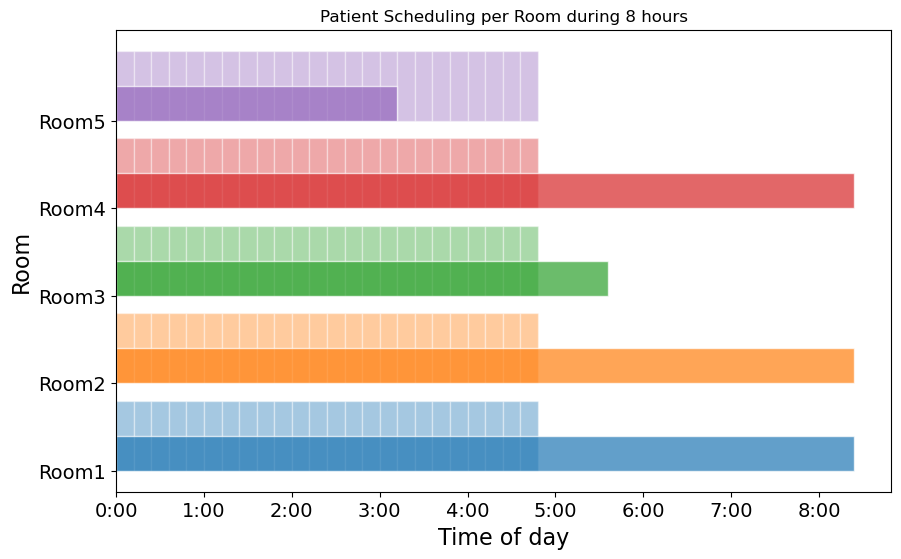

In [12]:
import pulp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Define decision variables
hours = list(range(24))
rooms = ['Room1', 'Room2', 'Room3', 'Room4', 'Room5']
x = pulp.LpVariable.dicts('x', (rooms, hours), lowBound=0, upBound=20, cat='Integer')

# Define optimization problem
prob = pulp.LpProblem('Patient Scheduling', pulp.LpMinimize)

# Define objective function
prob += pulp.lpSum([x[r][h] * (h - 8) for r in rooms for h in hours])

# Define constraints
for r in rooms:
    for h in hours:
        prob += x[r][h] <= 20
        prob += x[r][h] >= 0

        if h > 0:
            prob += x[r][h] - x[r][h-1] <= 1
            prob += x[r][h-1] - x[r][h] <= 1

        if h < 23:
            prob += x[r][h+1] - x[r][h] <= 1
            prob += x[r][h] - x[r][h+1] <= 1

    prob += pulp.lpSum([x[r][h] for h in hours]) <= 7*60/10  # 7 hours per day

for h in hours:
    prob += pulp.lpSum([x[r][h] for r in rooms]) <= 20  # maximum capacity per room

    for r in rooms:
        prob += x[r][h] <= 20

# Solve optimization problem
prob.solve()

for r in rooms:
    for h in hours:
        if x[r][h].value() > 0:
            print('{}: {} patients at {}:00'.format(r, int(x[r][h].value()), h))

# Create Gantt chart
room_colors = {'Room1': 'tab:blue', 'Room2': 'tab:orange', 'Room3': 'tab:green', 'Room4': 'tab:red', 'Room5': 'tab:purple'}

fig, ax = plt.subplots(figsize=(10, 6))

for r in rooms:
    y = np.zeros(24)
    for h in hours:
        y[h] = x[r][h].value()
    ax.broken_barh([(h, 1) for h in hours], (rooms.index(r), 0.8), facecolors=room_colors[r], alpha=0.4, edgecolor='white', lw=1)
    ax.barh(rooms.index(r)+0.2, y.sum(), height=0.4, left=0, color=room_colors[r], alpha=0.7, edgecolor='white', lw=1)

ax.set_yticks(np.arange(len(rooms)))
ax.set_yticklabels(rooms, fontproperties=font_manager.FontProperties(size=14))
ax.set_xticklabels([str(h) + ':00' for h in hours], fontproperties=font_manager.FontProperties(size=14))
ax.set_xlabel('Time of day', fontproperties=font_manager.FontProperties(size=16))
ax.set_ylabel('Room', fontproperties=font_manager.FontProperties(size=16))
ax.set_title("Patient Scheduling per Room during 8 hours")

plt.show()